In [1]:
pip install qiskit-optimization

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/645.9 kB ? eta -:--:--
     -------------------------------------- 645.9/645.9 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Created wheel for docplex: filename=docplex-2.29.245-py3-none-any.whl size=685492 sha256=11b8305ca726b0773ec16f9e8b87c3691d9a159e340335a5077205bfc2b479ac
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\76\2c\98\9e3985d56b170189911fe99ba8554e8f94a2bebd11301a69c2
Successful

In [2]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [17]:
def draw_graph(G, colors, pos):
    default_Axes = plt.axes(frameon=False)
    nx.draw(G, node_color=colors, node_size=600, alpha=0.8, ax=default_Axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

distance
 [[ 0. 49. 48. 52.]
 [49.  0. 39. 62.]
 [48. 39.  0. 24.]
 [52. 62. 24.  0.]]


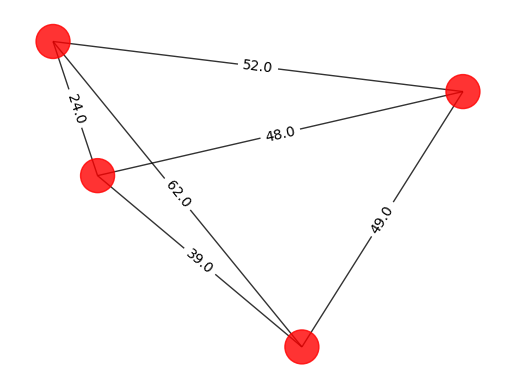

In [ ]:
n = 4
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=420)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ['r' for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

order = (0, 1, 2, 3) Distance = 125.0
order = (0, 1, 3, 2) Distance = 118.0
Best order from brute force = (0, 1, 3, 2) with total distance = 118.0


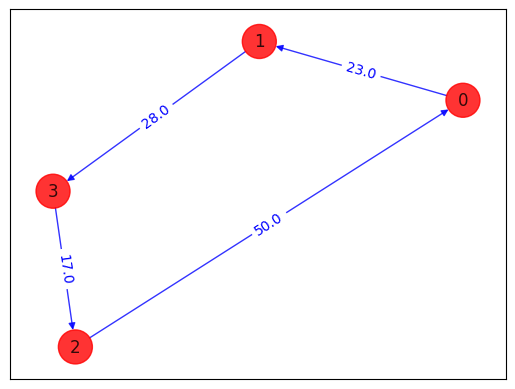

In [29]:
from itertools import permutations

def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order


best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)


def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [30]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  23*x_0_0*x_1_1 + 23*x_0_0*x_1_3 + 50*x_0_0*x_2_1 + 50*x_0_0*x_2_3
  + 46*x_0_0*x_3_1 + 46*x_0_0*x_3_3 + 23*x_0_1*x_1_0 + 23*x_0_1*x_1_2
  + 50*x_0_1*x_2_0 + 50*x_0_1*x_2_2 + 46*x_0_1*x_3_0 + 46*x_0_1*x_3_2
  + 23*x_0_2*x_1_1 + 23*x_0_2*x_1_3 + 50*x_0_2*x_2_1 + 50*x_0_2*x_2_3
  + 46*x_0_2*x_3_1 + 46*x_0_2*x_3_3 + 23*x_0_3*x_1_0 + 23*x_0_3*x_1_2
  + 50*x_0_3*x_2_0 + 50*x_0_3*x_2_2 + 46*x_0_3*x_3_0 + 46*x_0_3*x_3_2
  + 39*x_1_0*x_2_1 + 39*x_1_0*x_2_3 + 28*x_1_0*x_3_1 + 28*x_1_0*x_3_3
  + 39*x_1_1*x_2_0 + 39*x_1_1*x_2_2 + 28*x_1_1*x_3_0 + 28*x_1_1*x_3_2
  + 39*x_1_2*x_2_1 + 39*x_1_2*x_2_3 + 28*x_1_2*x_3_1 + 28*x_1_2*x_3_3
  + 39*x_1_3*x_2_0 + 39*x_1_3*x_2_2 + 28*x_1_3*x_3_0 + 28*x_1_3*x_3_2
  + 17*x_2_0*x_3_1 + 17*x_2_0*x_3_3 + 17*x_2_1*x_3_0 + 17*x_2_1*x_3_2
  + 17*x_2_2*x_3_1 + 17*x_2_2*x_3_3 + 17*x_2_3*x_3_0 + 17*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2

In [31]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 26406.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIII

In [32]:
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo)
print(result.prettyprint())

objective function value: 118.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0
status: SUCCESS


energy: -26288.000000000007
tsp objective: 117.99999999999272
feasible: True
solution: [3, 2, 0, 1]
solution objective: 118.0


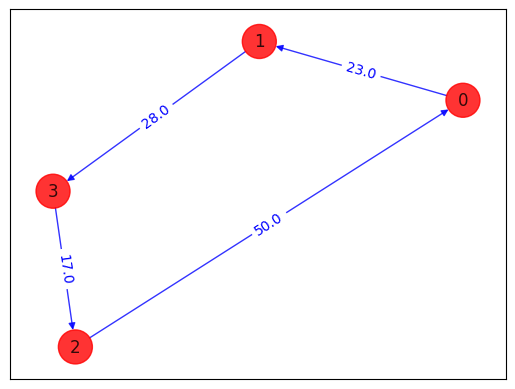

In [33]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [35]:
import tutorial_magics

%qiskit_version_table
%qiskit_copyright